In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import rand, round
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType
import matplotlib.pyplot as plt

# Initialize the Spark session
spark = SparkSession.builder.getOrCreate()  # Skip session creation if already connected to Spark

In [2]:
# Create an initial DataFrame with only the `id` column
data = [(i,) for i in range(1, 101)]  # Generate 100 rows with sequential IDs
schema = StructType([StructField("id", IntegerType(), True)])
df = spark.createDataFrame(data, schema=schema)

# Add a `value` column with random values, rounded to 2 decimal places
df = df.withColumn("value", round(rand(), 2))

# Define HDFS path
hdfs_path = "hdfs:///share/test_data"

# Write DataFrame to HDFS
df.write.mode("overwrite").parquet(hdfs_path)

# Read the data back from HDFS
df_hdfs = spark.read.parquet(hdfs_path)

# Show a sample of the data
df_hdfs.show(10)

24/11/09 08:17:45 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 96.54% for 7 writers
24/11/09 08:17:45 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 84.47% for 8 writers
24/11/09 08:17:45 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 75.08% for 9 writers
24/11/09 08:17:45 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 67.58% for 10 writers
24/11/09 08:17:45 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 61.43% for 11 writers
24/11/09 08:17:45 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,014 bytes) of heap memory
Scaling row group sizes to 56.31% for 12 writers
24/11/09 08:17:45 WARN MemoryManager: Total allocation exceeds 95.00% (906,992,

+---+-----+
| id|value|
+---+-----+
| 91| 0.97|
| 92| 0.29|
| 93| 0.51|
| 94| 0.83|
| 95| 0.62|
| 96| 0.01|
| 97| 0.76|
| 98| 0.84|
| 99| 0.16|
|100| 0.31|
+---+-----+
only showing top 10 rows



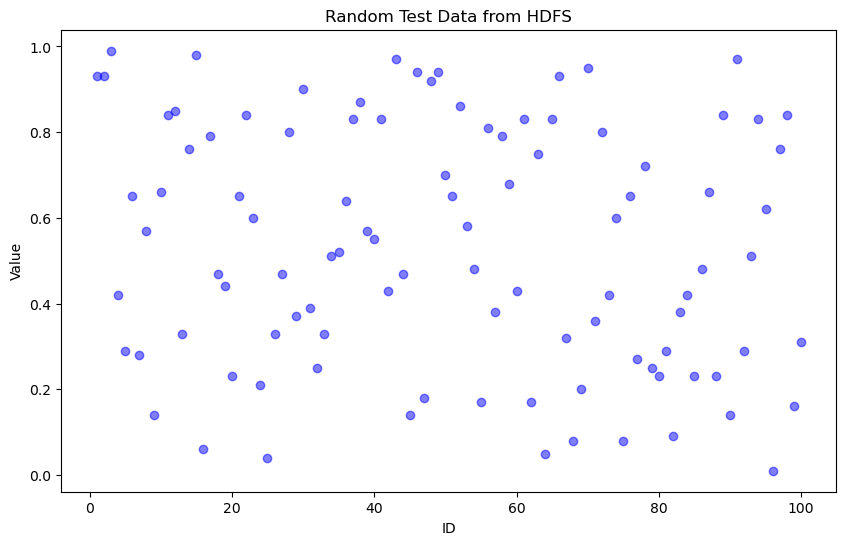

In [3]:
# Collect data to Pandas for plotting (only small data)
df_pandas = df_hdfs.toPandas()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(df_pandas["id"], df_pandas["value"], color="blue", alpha=0.5)
plt.xlabel("ID")
plt.ylabel("Value")
plt.title("Random Test Data from HDFS")
plt.show()